# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

data = pd.read_csv("data_arma.csv", index_col = 0)
data.head()

,ts1,ts2,ts3,ts4
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


 # Serie ts1:

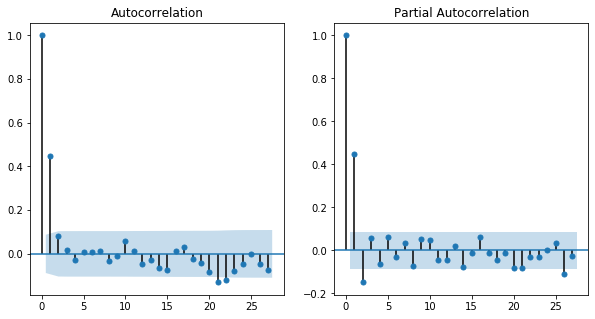

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(data['ts1'], ax=ax[0])
plot_pacf(data['ts1'], ax=ax[1])
plt.show()

A partir de los correlegramas, la serie ts1 puede tener un proceso MA(1). También, es posible que sea un ARMA(2,1).

# Serie ts2:


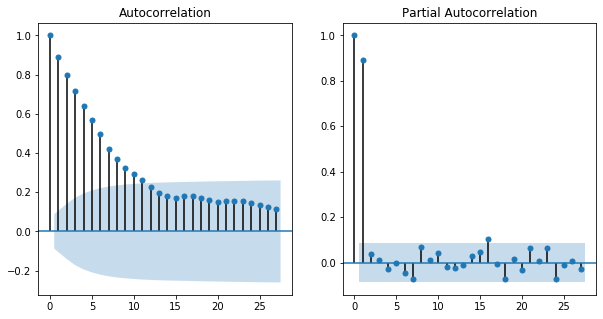

In [22]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(data['ts2'], ax=ax[0])
plot_pacf(data['ts2'], ax=ax[1])
plt.show()

Se observa un posible proceso AR(1) en la serie ts2. Así mismo, el autocorrelograma simple nos muestra que la serie posiblemente es no estacionaria y requiere un proceso de diferenciación.

# Serie ts3:

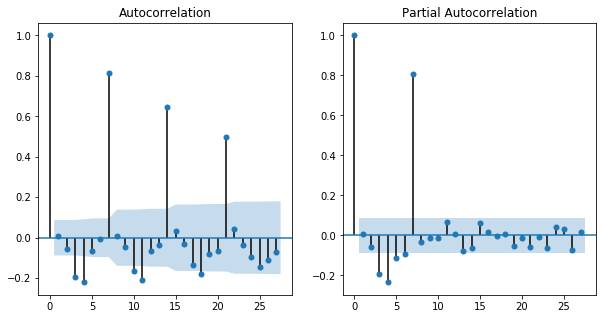

In [23]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(data['ts3'], ax=ax[0])
plot_pacf(data['ts3'], ax=ax[1])
plt.show()

En esta serie (ts3), podemos observar que tenemos un rezago cada 7 periodos, lo que indica que posiblemente el proceso es un AR(7). Es posible que estos rezagos representen una estacionalidad de la serie. No obstante, para tener una conclusión con respecto al proceso es necesario realizar primero las pruebas de estacionariedad.

# Serie ts4:

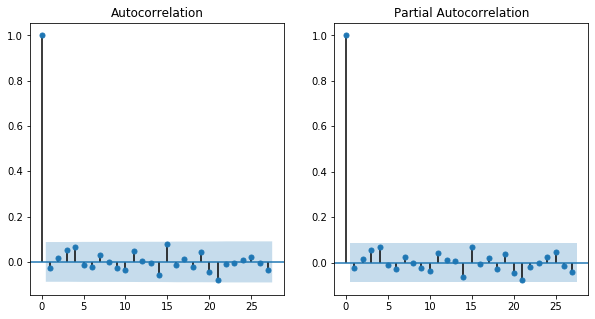

In [25]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(data['ts4'], ax=ax[0])
plot_pacf(data['ts4'], ax=ax[1])
plt.show()

Vemos que los rezagos no son significativos en la serie, lo cual indica que la serie obedece aun proceso de ruido blanco o caminata aleatoria.

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

In [6]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('../datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


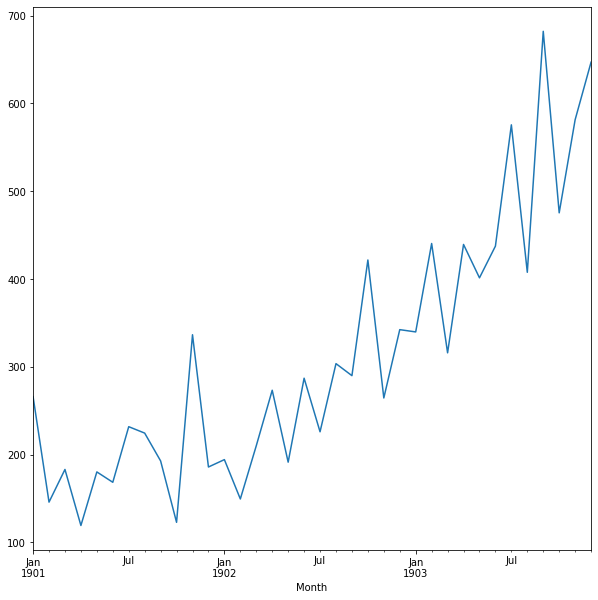

In [7]:
print(series.head())
series.plot(figsize=(10, 10));

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060142
p-value: 1.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


Observamos que la serie presenta una raíz unitaria y por lo tanto sería necesario diferenciarla.

In [11]:
result = adfuller(series.diff()[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.249074
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


In [12]:
series_2=series.diff()[1:]

C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


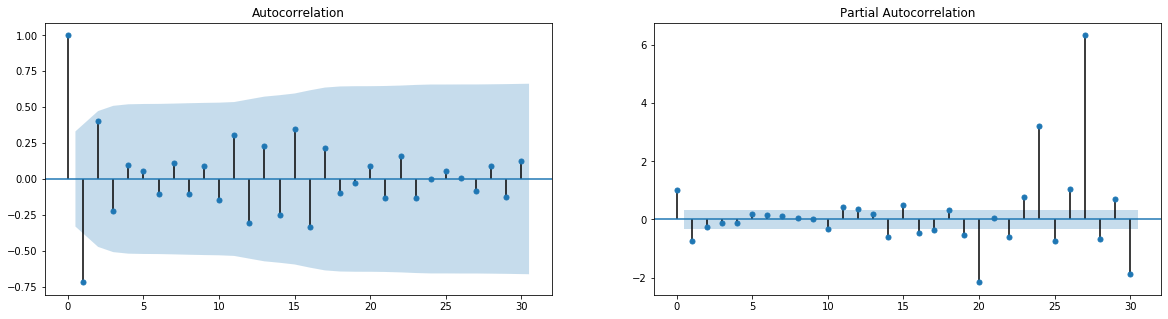

In [81]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_acf(series_2, ax=ax[0],lags=30)
plot_pacf(series_2, ax=ax[1],lags=30)
plt.show()

En una primera inspección el modelo identificado sería un ARIMA(1,1,1). Sin embargo, el rezago de orden 2 en el autocorrelograma parcial está muy cerca de las bandas de confianza, para ello se estimará un modelo ARIMA(2,1,1) para corroborar que dicho rezago no sea significativo.

In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
# fit model
model = ARIMA(series, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -197.143
Method:                       css-mle   S.D. of innovations             66.417
Date:                Thu, 18 Jun 2020   AIC                            404.286
Time:                        19:05:44   BIC                            412.063
Sample:                    02-01-1901   HQIC                           406.971
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0485      3.685      3.270      0.003       4.826      19.271
ar.L1.D.Sales    -0.6754      0.299     -2.262      0.031      -1.261      -0.090
ar.L2.D.Sales    -0.1138      0.262     

C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


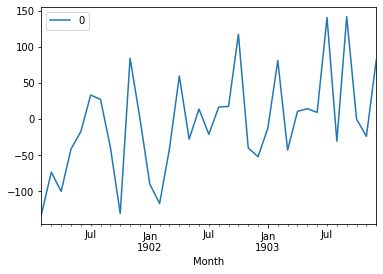

In [25]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

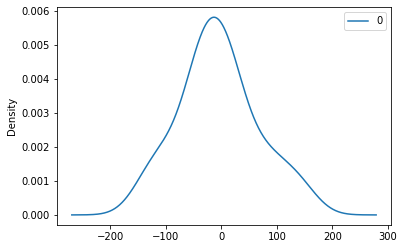

                0
count   35.000000
mean    -5.391701
std     69.826649
min   -132.148541
25%    -41.534451
50%    -12.305309
75%     22.172255
max    141.717887


In [26]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [62]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
interval_low=[]
interval_high=[]

In [63]:
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    interval_low.append(output[2][0][0])
    interval_high.append(output[2][0][1])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=334.879297, expected=342.300000
predicted=296.063306, expected=339.700000
predicted=324.417647, expected=440.400000
predicted=335.758845, expected=315.900000
predicted=382.935770, expected=439.300000
predicted=344.458274, expected=401.300000
predicted=402.010801, expected=437.400000
predicted=400.038895, expected=575.500000
predicted=442.965439, expected=407.600000
predicted=499.230613, expected=682.000000
predicted=447.058770, expected=475.300000
predicted=619.429286, expected=581.300000
predicted=548.325347, expected=646.900000


In [64]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % error)

Test RMSE: 88.089


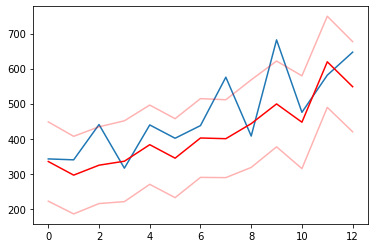

In [65]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.plot(interval_low, color='red' ,alpha=0.3)
plt.plot(interval_high, color='red' ,alpha=0.3)
plt.show()

In [66]:
# fit model
model_1 = ARIMA(series, order=(1,1,1))
model_fit_1 = model_1.fit(disp=0)
print(model_fit_1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Thu, 18 Jun 2020   AIC                            402.467
Time:                        19:19:53   BIC                            408.688
Sample:                    02-01-1901   HQIC                           404.614
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0965      3.651      3.313      0.002       4.940      19.253
ar.L1.D.Sales    -0.5674      0.161     -3.526      0.001      -0.883      -0.252
ma.L1.D.Sales    -0.5133      0.155     

C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


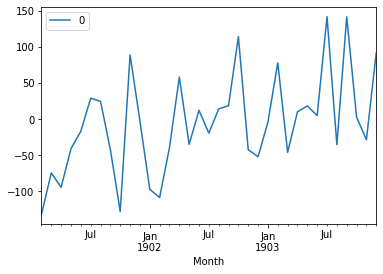

In [67]:
# plot residual errors
residuals = pd.DataFrame(model_fit_1.resid)
residuals.plot()
plt.show()

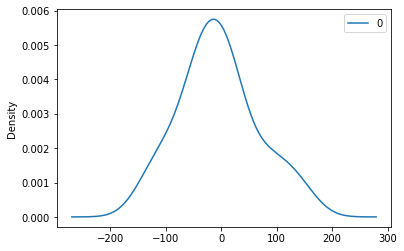

                0
count   35.000000
mean    -5.505171
std     69.978598
min   -132.196530
25%    -42.395607
50%     -4.181418
75%     21.540065
max    142.155107


In [68]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [77]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
interval_low=[]
interval_high=[]

In [78]:
for t in range(len(test)):
    model_1 = ARIMA(history, order=(1,1,1))
    model_fit_1 = model_1.fit(disp=0)
    output = model_fit_1.forecast()
    yhat = output[0]
    predictions.append(yhat)
    interval_low.append(output[2][0][0])
    interval_high.append(output[2][0][1])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=307.508697, expected=342.300000
predicted=301.813912, expected=339.700000
predicted=316.960393, expected=440.400000


C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=321.902404, expected=315.900000
predicted=359.566225, expected=439.300000
predicted=371.274842, expected=401.300000
predicted=410.775007, expected=437.400000
predicted=417.838800, expected=575.500000
predicted=441.257937, expected=407.600000
predicted=512.882280, expected=682.000000
predicted=462.954553, expected=475.300000
predicted=617.188444, expected=581.300000
predicted=551.350253, expected=646.900000


In [79]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % error)

Test RMSE: 83.688


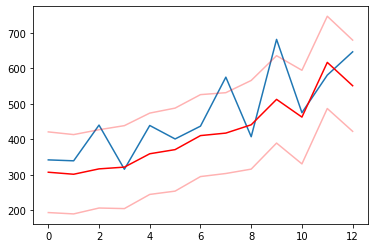

In [80]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.plot(interval_low, color='red' ,alpha=0.3)
plt.plot(interval_high, color='red' ,alpha=0.3)
plt.show()

In [97]:
def ARIMA_FUNCTION(p,q):

    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()

    for t in range(len(test)):
        model_1 = ARIMA(history, order=(p,1,q))
        model_fit_1 = model_1.fit(disp=0)
        output = model_fit_1.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))

    error = mean_squared_error(test, predictions)**0.5
    print('Test RMSE: %.3f' % error)

In [98]:
results=[]

for i in range(7):
    for j in range(2):
        if i>j or i==0:
            results.append([i,j,ARIMA_FUNCTION(i,j)])
            print((i,j))

predicted=264.431818, expected=342.300000
predicted=345.617391, expected=339.700000
predicted=342.770833, expected=440.400000
predicted=447.376000, expected=315.900000
predicted=317.819231, expected=439.300000
predicted=445.718519, expected=401.300000
predicted=406.132143, expected=437.400000
predicted=443.310345, expected=575.500000
predicted=585.816667, expected=407.600000
predicted=412.167742, expected=682.000000
predicted=695.000000, expected=475.300000
predicted=481.642424, expected=581.300000
predicted=590.573529, expected=646.900000
Test RMSE: 134.176
(0, 0)
predicted=299.040149, expected=342.300000
predicted=309.688211, expected=339.700000
predicted=321.391079, expected=440.400000
predicted=343.333303, expected=315.900000
predicted=351.522971, expected=439.300000
predicted=367.900614, expected=401.300000
predicted=391.075275, expected=437.400000
predicted=413.183291, expected=575.500000
predicted=470.911285, expected=407.600000
predicted=459.248684, expected=682.000000
predicte

C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=512.743577, expected=682.000000


C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=532.491966, expected=475.300000


C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=674.764835, expected=581.300000


C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=543.449926, expected=646.900000
Test RMSE: 86.821
(5, 1)
predicted=345.691870, expected=342.300000
predicted=305.082381, expected=339.700000
predicted=386.421602, expected=440.400000
predicted=348.546173, expected=315.900000
predicted=386.366650, expected=439.300000
predicted=355.288488, expected=401.300000
predicted=444.967395, expected=437.400000
predicted=393.170184, expected=575.500000
predicted=436.270388, expected=407.600000
predicted=507.796238, expected=682.000000
predicted=445.167634, expected=475.300000
predicted=655.825444, expected=581.300000
predicted=560.353490, expected=646.900000
Test RMSE: 82.523
(6, 0)
predicted=352.377239, expected=342.300000
predicted=307.740429, expected=339.700000
predicted=391.570133, expected=440.400000
predicted=354.430954, expected=315.900000
predicted=389.660237, expected=439.300000
predicted=352.595830, expected=401.300000
predicted=449.205215, expected=437.400000
predicted=399.951057, expected=575.500000
predicted=440.644873, expe

C:\Users\Jorge\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=629.023952, expected=682.000000
predicted=449.567260, expected=475.300000
predicted=665.409502, expected=581.300000
predicted=575.992069, expected=646.900000
Test RMSE: 66.476
(6, 1)


El modelo que minimiza el RMSE es un ARIMA(6,1,1)